### Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

### Libraries

In [207]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data

In [158]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/interview_j4.csv', 
                 header = None, 
                 names = ['result', 'job', 'time'])

df.head()

,result,job,time
0,START,JOB0,1357
1,START,JOB2,2405
2,END,JOB2,2379
3,START,JOB3,4010
4,START,JOB2,5209


### Explore Data

In [159]:
#Unique values of result
df['result'].unique()

array(['START', 'END'], dtype=object)

In [160]:
#Unique Values of job
df['job'].unique()

array(['JOB0', 'JOB2', 'JOB3', 'JOB4', 'JOB1'], dtype=object)

In [162]:
#Shape of DataFrame
df.shape

(999999, 3)

In [161]:
#Range of time
min(df['time']), max(df['time'])

(1357, 999999122)

### Convert `result` column values to individual Columns

In [76]:
df['idx'] = df.groupby(['job', 'result']).cumcount()

new_df = (df.pivot(index=['job', 'idx'], 
                   columns='result', 
                   values='time')
 .sort_index(level=1)
 .droplevel(1)).reset_index()

In [153]:
new_df = new_df.dropna()

In [48]:
new_df.head()

result,job,END,START
0,JOB0,1423.0,1357.0
1,JOB1,9526.0,9228.0
2,JOB2,2379.0,2405.0
3,JOB3,4862.0,4010.0
4,JOB4,7630.0,7402.0


### Calculate Interval

In [80]:
new_df['interval']  = new_df['END'] - new_df['START']
new_df.head()

result,job,END,START,interval
0,JOB0,1423.0,1357.0,66.0
1,JOB1,9526.0,9228.0,298.0
2,JOB2,2379.0,2405.0,-26.0
3,JOB3,4862.0,4010.0,852.0
4,JOB4,7630.0,7402.0,228.0


### Seggregate Dataframes based on Job

In [59]:
def job_dataframe(job, df = new_df):
  return df[df['job'] == job]

In [171]:
df0 = job_dataframe(job = 'JOB0')
df1 = job_dataframe(job = 'JOB1')
df2 = job_dataframe(job = 'JOB2')
df3 = job_dataframe(job = 'JOB3')
df4 = job_dataframe(job = 'JOB4')

In [67]:
df0.head()

result,job,END,START,interval
0,JOB0,1423.0,1357.0,66.0
5,JOB0,33277.0,33325.0,-48.0
10,JOB0,42284.0,42250.0,34.0
15,JOB0,53466.0,53218.0,248.0
20,JOB0,62158.0,62073.0,85.0


### Calculate Statistics and store in a dataframe

In [130]:
def calculate_stats(df_list):

  df_x = pd.DataFrame(columns = ['mean', 'median', 'std'])  #Declare empty Dataframe

  for df in df_list:
    
    name =[x for x in globals() if globals()[x] is df][0]   #To attain name of dataframe

    df_x = df_x.append({'df' : name,                        #Append statistics to dataframe
                        'mean' : df['interval'].mean(), 
                        'median' : df['interval'].median(), 
                        'std' : df['interval'].std()},  
                ignore_index = True) 
    
  return df_x      

In [177]:
df_list  = [df0, df1, df2, df3, df4]

df_stats = calculate_stats(df_list)
df_stats.head()

,mean,median,std,df
0,251.094843,251.0,248.914388,df0
1,251.089354,252.0,249.738702,df1
2,250.401057,251.0,250.083817,df2
3,250.550907,250.0,249.543634,df3
4,250.036090,249.0,250.829321,df4


### Plot Interval

In [183]:
def plot_interval(df, job):
  fig_dims = (30, 10)
  fig, ax = plt.subplots(figsize=fig_dims)
  plt.title('Timestamp vs Interval for ' + job)

  sns.lineplot(x = 'START', y = 'interval', data = df, ax = ax)

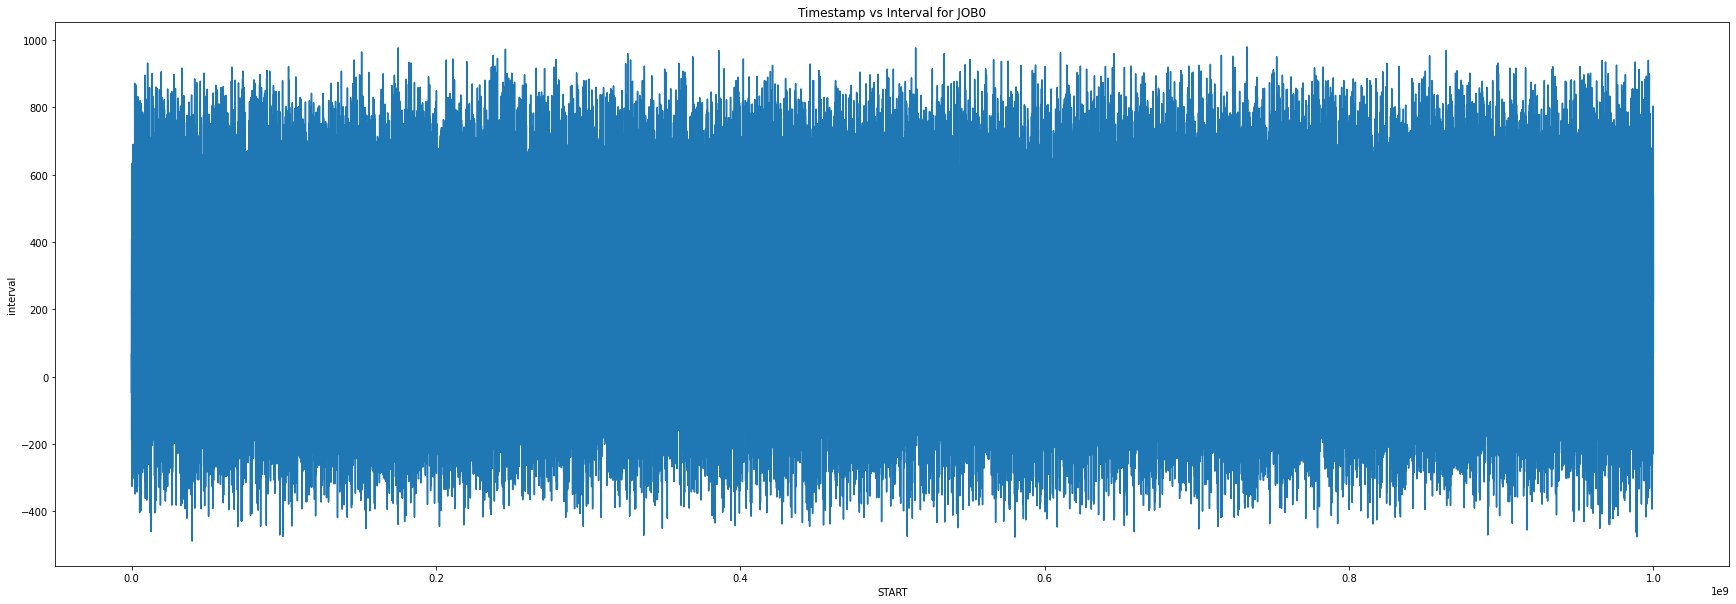

In [184]:
plot_interval(df0, 'JOB0') 

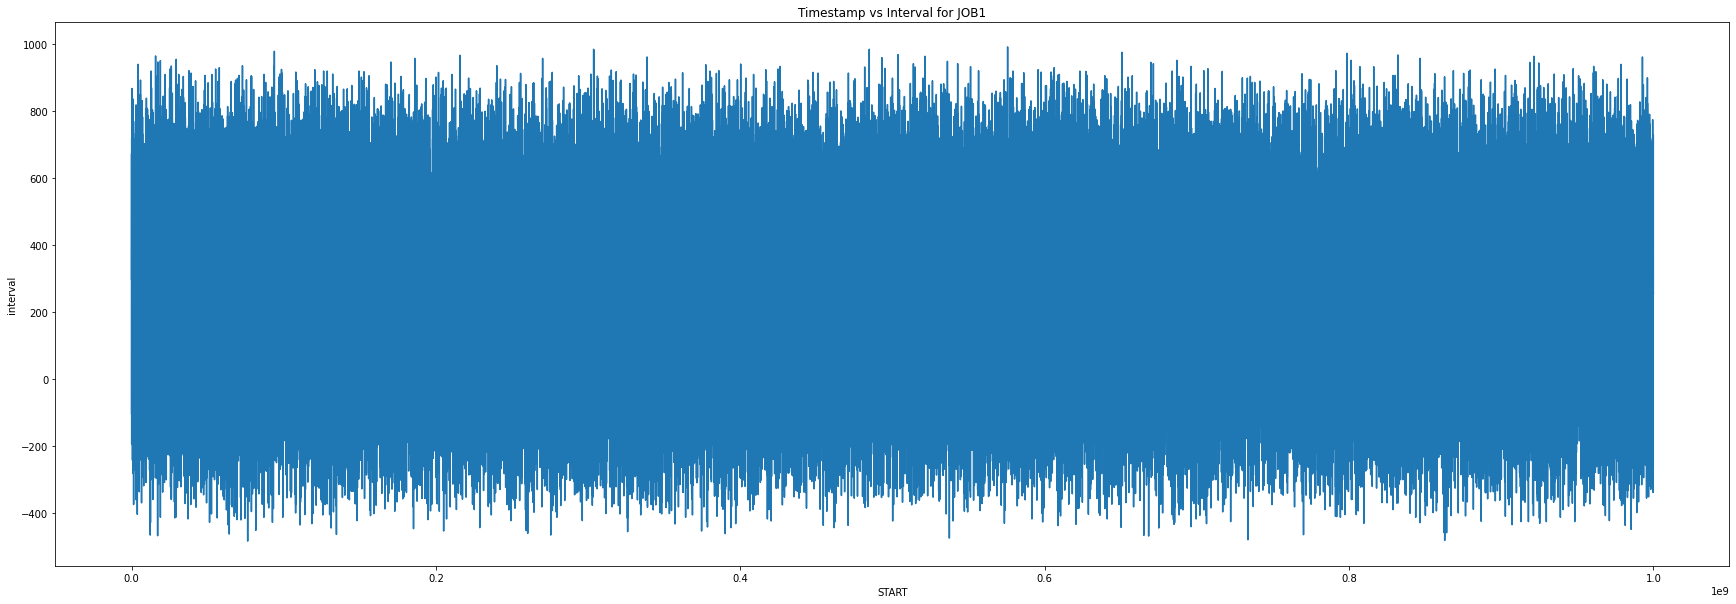

In [185]:
plot_interval(df1, 'JOB1')

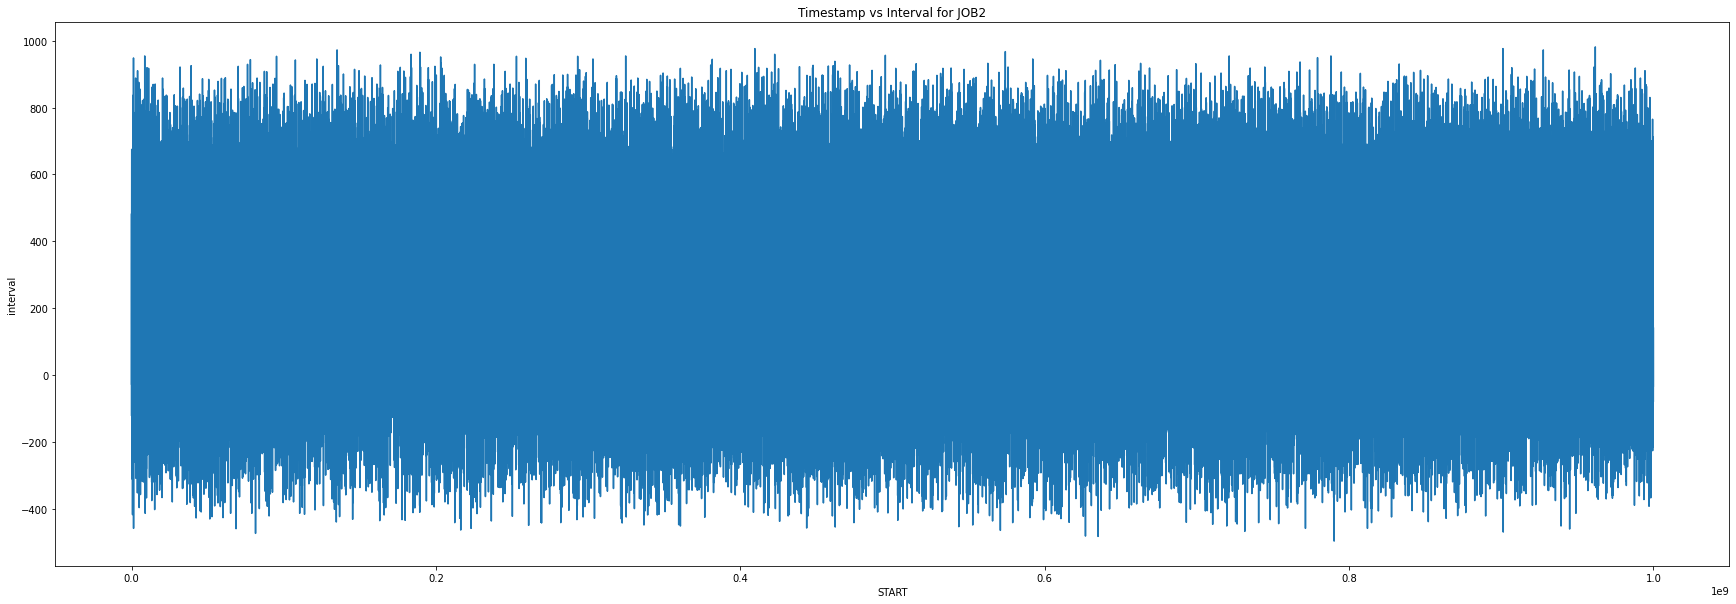

In [186]:
plot_interval(df2, 'JOB2')

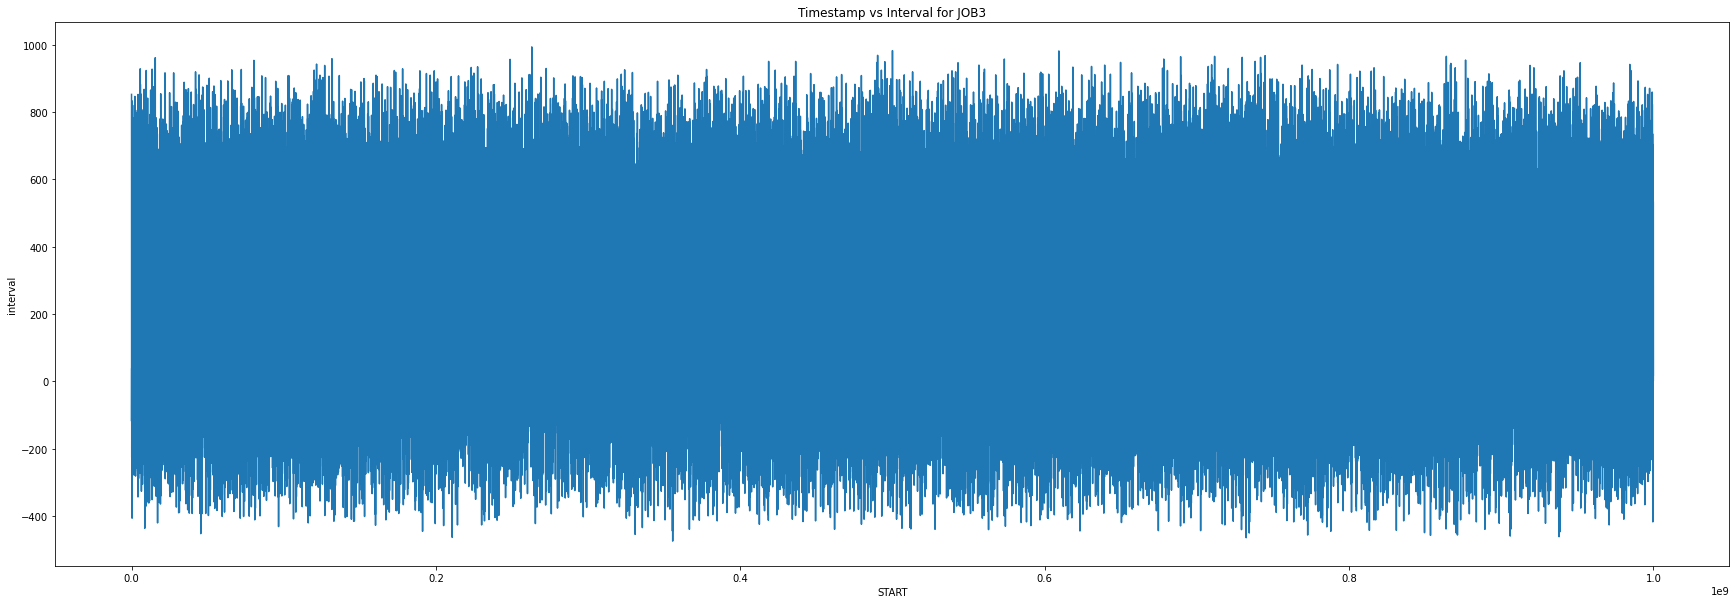

In [187]:
plot_interval(df3, 'JOB3')

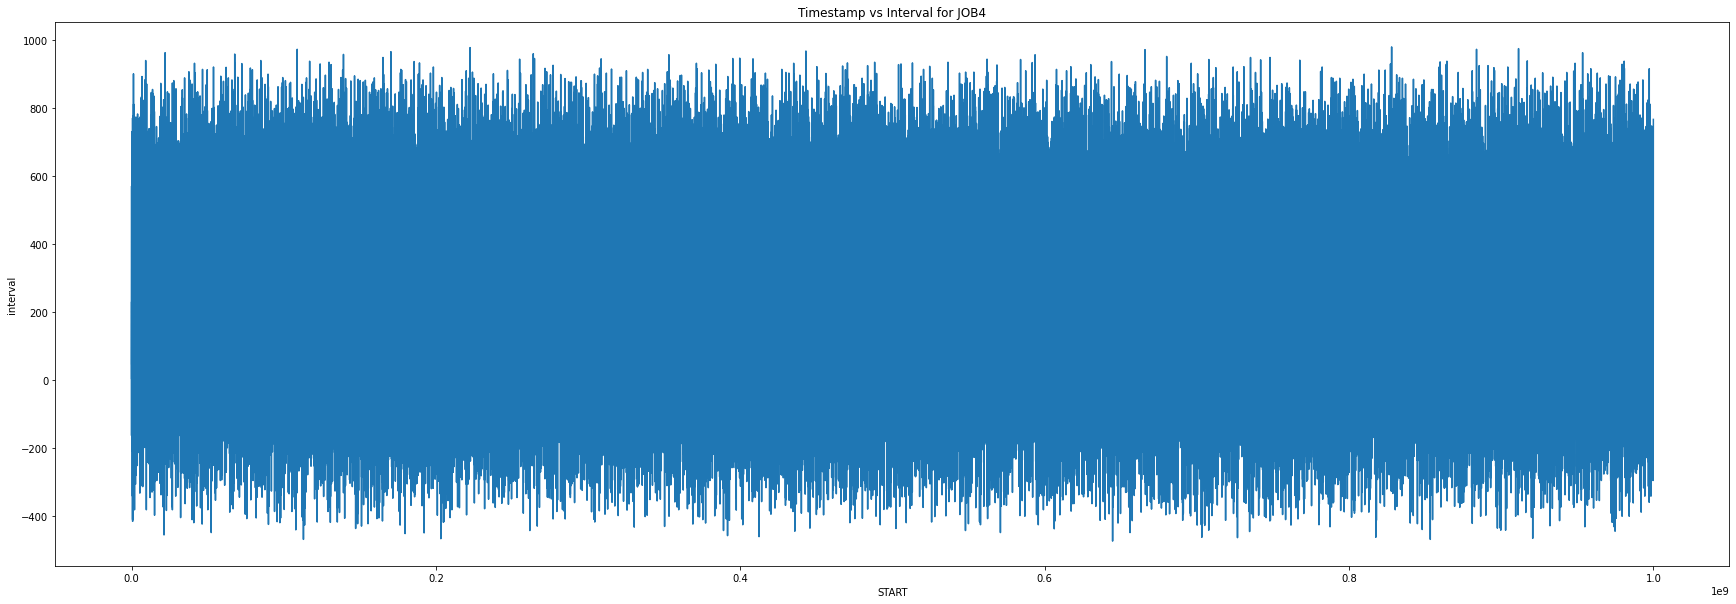

In [188]:
plot_interval(df4, 'JOB4')